<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Patient_Engagement_And_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

# Load the existing CSV
df = pd.read_csv('patient_engagement_retention.csv')

### Data Cleaning

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Ensure all other columns are of the correct type
print(df.dtypes)


Patient_ID           0
Date                 0
Age                  0
Gender               0
Interaction_Count    0
Engagement_Score     0
Retention_Status     0
dtype: int64
0
Patient_ID                    int64
Date                 datetime64[ns]
Age                           int64
Gender                       object
Interaction_Count             int64
Engagement_Score            float64
Retention_Status              int64
dtype: object


##Feature Engineering

In [ ]:
# Create date-related features
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Create lag features
df['Lagged_Engagement_Score_1'] = df.groupby(['Patient_ID'])['Engagement_Score'].shift(1)
df['Lagged_Interaction_Count_1'] = df.groupby(['Patient_ID'])['Interaction_Count'].shift(1)

# Fill NaN values in lag features
df.fillna(0, inplace=True)

df.head()


,Patient_ID,Date,Age,Interaction_Count,Engagement_Score,Retention_Status,Day_of_Week,Month,Quarter,Gender_Male,Lagged_Engagement_Score_1,Lagged_Interaction_Count_1
0,8270,2023-11-15,28,3,44.684150,0,2,11,4,False,0.0,0.0
1,1860,2022-10-31,33,3,41.250442,0,0,10,4,False,0.0,0.0
2,6390,2023-05-13,46,4,10.794931,0,5,5,2,False,0.0,0.0
3,6191,2022-08-25,72,6,54.997299,1,3,8,3,False,0.0,0.0
4,6734,2022-08-18,56,6,97.928545,1,3,8,3,True,0.0,0.0


##Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable
features = ['Age', 'Interaction_Count', 'Engagement_Score', 'Day_of_Week', 'Month', 'Quarter', 'Gender_Male', 'Lagged_Engagement_Score_1', 'Lagged_Interaction_Count_1']
target = 'Retention_Status'

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_df[features], train_df[target])

# Make predictions
test_df['Predicted_Retention_Status'] = model.predict(test_df[features])

# Evaluate the model
accuracy = accuracy_score(test_df[target], test_df['Predicted_Retention_Status'])
print(f'Accuracy: {accuracy}')

print(confusion_matrix(test_df[target], test_df['Predicted_Retention_Status']))
print(classification_report(test_df[target], test_df['Predicted_Retention_Status']))



Accuracy: 0.4878
[[2596 2326]
 [2796 2282]]
              precision    recall  f1-score   support

           0       0.48      0.53      0.50      4922
           1       0.50      0.45      0.47      5078

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



## Checking Result

In [ ]:
test_df[['Retention_Status','Predicted_Retention_Status']]

,Retention_Status,Predicted_Retention_Status
33553,0,1
9427,1,1
199,0,1
12447,0,0
39489,1,0
...,...,...
28567,1,1
25079,1,1
18707,0,1
15200,1,0


##Model Evaluation

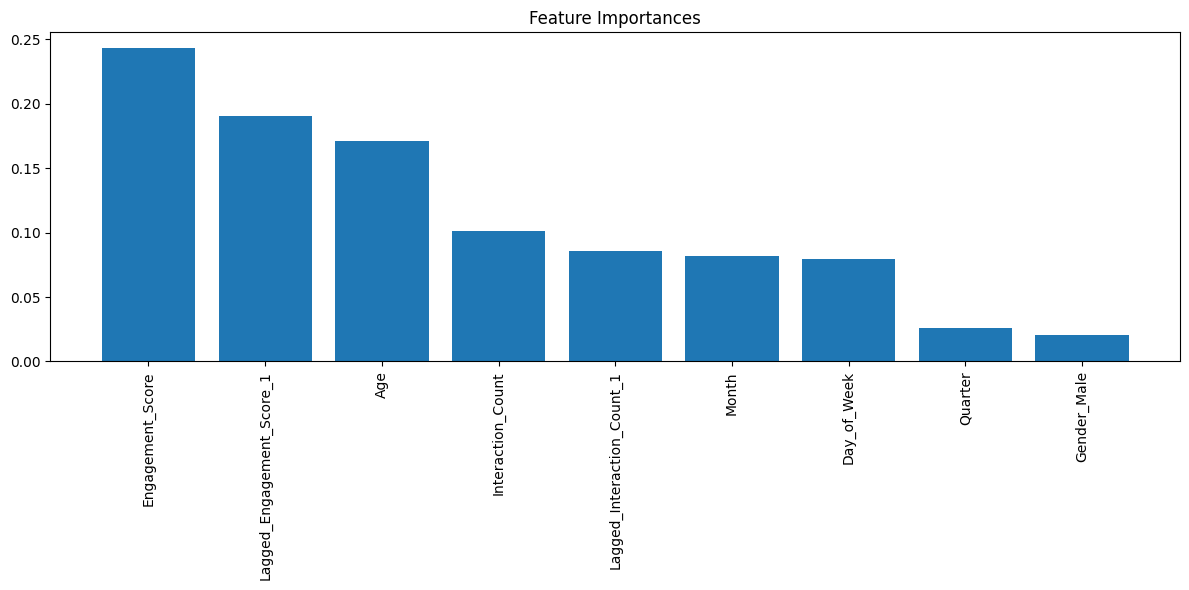

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
